# What are the most demanded skills for top 3 most popular data roles?

## Methodology

1. Clean-up skill column
2. Calculate skill count base on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [65]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [40]:
df_US = df[df['job_country'] == 'United States'].copy()

# 1
df_skills = df_US.explode('job_skills')

# 2
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() #return series
df_skills_count = skills_count.reset_index(name='skills_count') #convert series to dataframe
df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)

df_skills_count
# skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


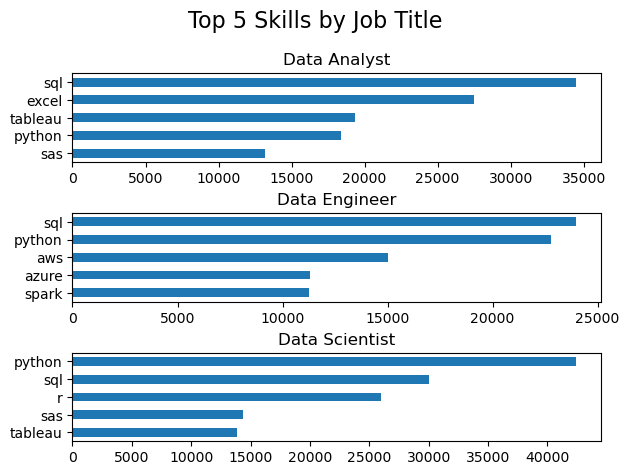

In [41]:
job_title = df_skills_count['job_title_short'].unique().tolist()
# job_title = ['Data Scientist', 'Data Analyst', 'Data Engineer']
job_title = sorted(job_title[:3])

fig, ax = plt.subplots(len(job_title), 1)
# fig, ax = plt.subplots(3, 1)

for i, title in enumerate(job_title): #enumerate to get index
  df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5) #filtering the dataframe based on job title
  df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=title, legend=False, xlabel='') #legend false to hide legend
  ax[i].invert_yaxis() #to make the highest value on top of the chart
  ax[i].set_ylabel('')
  # ax[i].set_xlim(0, 50_000)
  # ax[i].set_xlim(0, df_skills_count['skills_count'].max() + 10) #set x limit to make the chart more readable
  
fig.suptitle('Top 5 Skills by Job Title', fontsize=16)
fig.tight_layout(h_pad=.5)

In [51]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [52]:
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [61]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_perc'] = df_skills_perc['skills_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skills_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


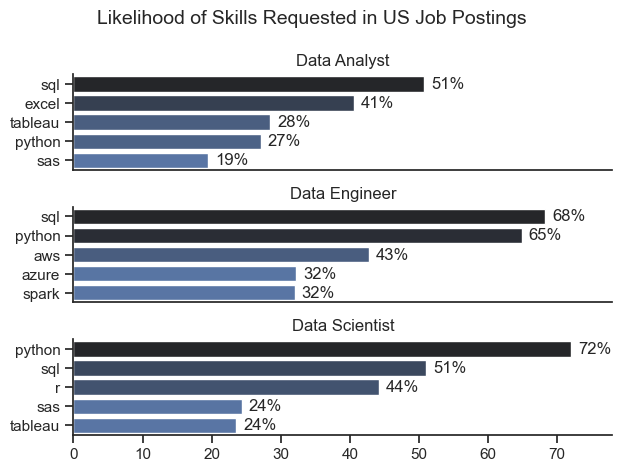

In [95]:
job_title = df_skills_perc['job_title_short'].unique().tolist()
job_title = sorted(job_title[:3])

fig, ax = plt.subplots(len(job_title), 1)

sns.set_theme(style='ticks')
for i, title in enumerate(job_title): #enumerate to get index
  df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].head(5)
  sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skills_count', legend=False, palette='dark:b_r')
  ax[i].set_title(job_title[i])
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')
  ax[i].set_xlim(0, 78)
  
  for n, v in enumerate(df_plot['skill_perc']):
    ax[i].text(v +1, n, f'{v:.0f}%', va='center')
  
  if i != len(job_title) -1:
    ax[i].set_xticks([])
    

sns.despine()
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=14)
fig.tight_layout(h_pad=1)